<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### June 13th, 2024

# First hour - Artificial neural networks


### Introduction to Neural Networks

Neural networks are sophisticated computational models central to the field of artificial intelligence. Inspired by the structure and function of the neurons, these networks are essentially algorithms designed to recognize patterns. Just as neurons in our brain connect in complex patterns to process information, artificial neural networks (ANNs) use layers of interconnected artificial neurons—or nodes—to perform intricate computations. Each node in a network acts like a mini-decision maker, working in harmony to analyze and interpret data of any type (e.g., numbers, images, signals, and text).

#### Example of Applications
The versatility of neural networks allows them to be applied in numerous fields. Here are a few notable applications:
- **Image Recognition**: Neural networks excel in identifying and classifying objects within images, making them invaluable in areas like medical imaging, security surveillance, and autonomous vehicles.
- **Speech Recognition**: These networks transform spoken language into text, underpinning technologies used in voice-activated assistants, real-time translation apps, and accessibility tools for those with speech impairments.
- **Recommendation Systems**: By analyzing patterns in user behavior, neural networks power the recommendation engines behind platforms like Netflix and Amazon, suggesting movies, products, and even new friends on social networks based on user preferences and past activities.

These examples just scratch the surface of how neural networks are integrated into everyday technologies, enhancing capabilities and improving user experiences across various domains. Through their ability to learn and adapt, neural networks continue to push the boundaries of what machines can do, driving innovation across the digital landscape.

## Basic Concepts Involved in Artificial Neural Networks

**Neurons**

In the human brain, a neuron is a cell that processes and transmits information through electrical and chemical signals. It consists of a cell body, dendrites that receive signals, and an axon that sends signals to other neurons. An artificial neuron in a neural network works in an analogous, yet much simplified manner. It receives input, processes it through a mathematical function, and outputs the result.

**Weights**

Each connection between two neurons has a weight that is adjusted as the network learns, determining the strength of one neuron's influence on another.

**Activation Function**

The activation function transforms the value calculated by a neuron into an output. Sigmoid functions are often used for this purpose, to ensure that neural calculations are ceiled and floored to a certain range. We will discuss further activation functions tomorrow.

**Biases**

Biases are additional parameters that allow the model to fit better with the data by shifting the activation function to the left or right, which can be critical for learning complex patterns.

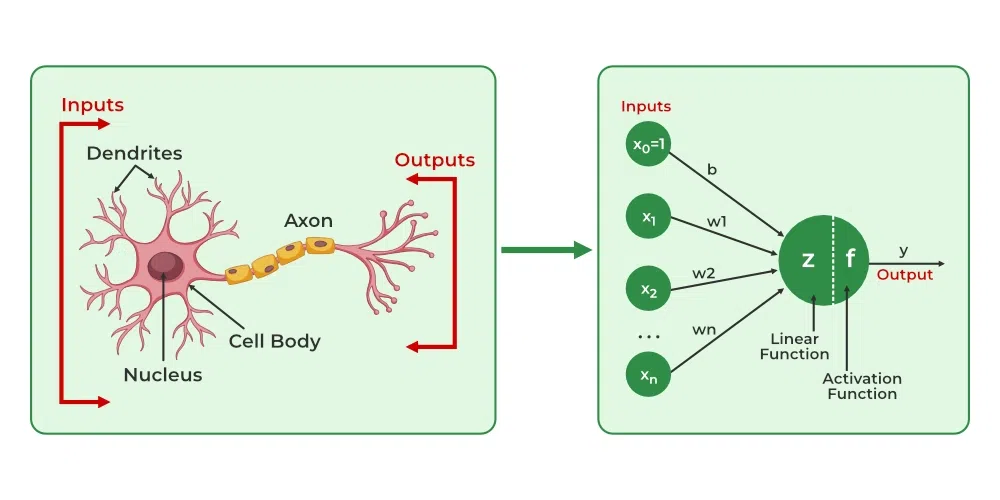

[Image courtesy of [Geeks for Geeks](https://www.geeksforgeeks.org/artificial-neural-networks-and-its-applications/).]


Here is an example of a simple artificial neuron coded in Python:

In [1]:
import numpy as np

def artificial_neuron(inputs, weights, bias):
    # Calculate the sum of inputs * weights + bias
    model_output = np.dot(inputs, weights) + bias
    return model_output

# Example inputs and neuron parameters
inputs = np.array([0.5, 0.3, 0.2])
weights = np.array([0.4, 0.7, 0.2])
bias = 0.5

output = artificial_neuron(inputs, weights, bias)
print("Output of the artificial neuron:", output)


Output of the artificial neuron: 0.9500000000000001


**Layers**

Most neural networks are structured into layers, each consisting of multiple neurons. We distinguish between the following types of layers:

* **Input Layer**: This is the entry point of the data into the network. The number of neurons in this layer typically matches the number of [*features*](https://www.machinelearninghelp.org/tutorials/introduction/what-is-a-feature-in-machine-learning/) in the input dataset.

* **Hidden Layers**: These layers are between the input and output layers and can be one or multiple.

* **Output Layer**: The final layer that produces the output of the network. The design of this layer depends on the type of prediction or classification required by the network.

**Forward Propagation**

Given a sequential architecture with multiple layers, the input signal needs to propagate through the layers, one at a time, before it can reach the output. This process is called forward propagation. During this process, each neuron in a layer receives inputs from the previous layer, multiplies these inputs by their corresponding weights, adds the bias, and passes the result through an activation function to produce its output. This output then becomes the input for the next layer. The process continues until the output layer produces the final prediction.


Here is how you might implement in Python a simple network with three layers:

In [2]:
def sigmoid(x):
    ''' Sigmoid activation function. '''
    return 1 / (1 + np.exp(-x))

# Weights and biases for each layer
weights_hidden = np.array([[0.1, 0.2],
                           [0.3, 0.4],
                           [0.5, 0.6]])
bias_hidden = np.array([0.1, 0.2])

weights_output = np.array([0.7, 0.8])
bias_output = 0.3

# Data input
inputs = np.array([0.6, 0.1, 0.8])

# Forward pass through the network
hidden_layer_input = np.dot(inputs, weights_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output
output = sigmoid(output_layer_input)

print("Output of the network:", output)


Output of the network: 0.7873671644359439


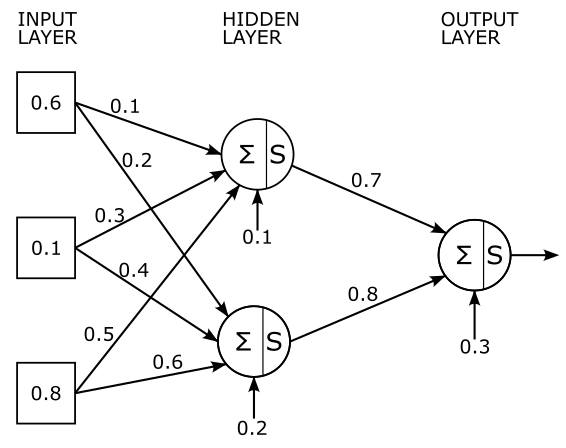

**Loss Functions**

A loss function measures how well the output of the network matches the expected outcomes. It quantifies the error between the predicted values and the true values and this error is used during training to refine the weights and biases of the model. Some classical loss functions include:

*    [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error): Used for regression tasks.
*    [Cross-Entropy](https://en.wikipedia.org/wiki/Cross-entropy): Often used in classification tasks.

**Backpropagation**

The value of the loss function is reduced by optimizing the weights and biases. Weights and biases are typically initialized randomly and are then adjusted through a process known as backpropagation. Backpropagation is the heart of the neural network training process. This is how the network learns. After computing the loss, backpropagation works by calculating the gradient (the derivative) of the loss function with respect to each weight and bias in the network, which indicates how the loss would change if the weights and biases were increased or decreased. These gradients are then used to update the weights and biases, typically moving them in the direction that minimizes the loss.

Gradients are computed, by representing the operations as a computational graph and applying the chain rule to perform the derivation. This process is illustrated below [taken from this [video](https://www.youtube.com/watch?v=dB-u77Y5a6A&ab_channel=MichiganOnline)].

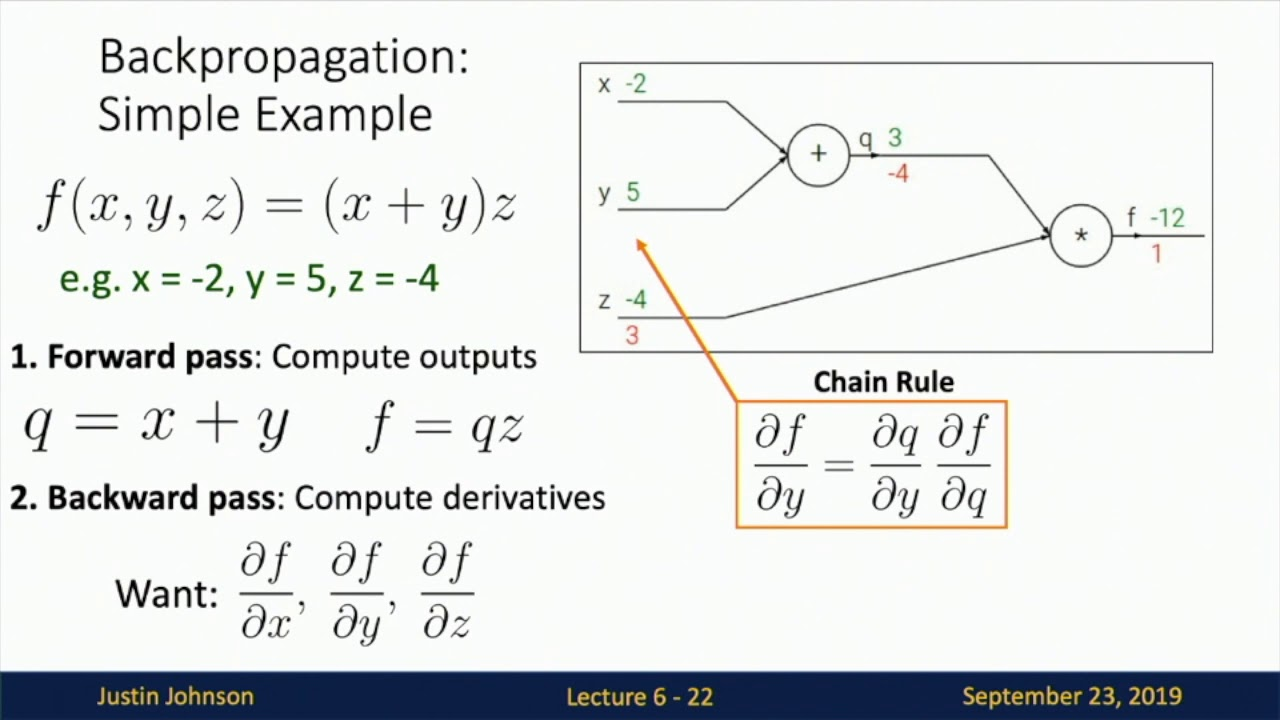



Here is an example of how such a backpropagation process can be implemented in Python (with one input and one neuron only, for simplicity):

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# defining a loss function
def mse_loss(y_true, y_pred):
    return np.square(np.subtract(y_true, y_pred)).mean()

np.random.seed(0)  # For reproducibility

# Random initial weights and a bias
weights = np.random.randn()  # Only one neuron, one weight
bias = np.random.randn()

# Example input and true output
input_feature = np.array([1.5])  # Input feature
true_output = np.array([1])      # True label

# Learning rate
learning_rate = 0.2

nb_iteration = 10000

for i in range(nb_iteration):
  # Calculate neuron input
  neuron_input = np.dot(input_feature, weights) + bias

  # Calculate neuron output
  neuron_output = sigmoid(neuron_input)

  # Initial loss
  loss = mse_loss(true_output, neuron_output)

  if i % 1000 == 0:
    print(f"{i:4} Loss: {loss:.8f}; Output: {neuron_output[0]:.4f}")

  # Gradient of the loss function w.r.t the output of the neuron
  d_loss_d_output = 2 * (neuron_output - true_output)

  # Gradient of the output of the neuron w.r.t its input (chain rule)
  d_output_d_input = sigmoid_derivative(neuron_input)

  # Gradient of the input of the neuron w.r.t weights
  d_input_d_weights = input_feature

  # Gradient of the loss w.r.t weights (chain rule)
  d_loss_d_weights = d_loss_d_output * d_output_d_input * d_input_d_weights

  # Gradient of the loss w.r.t bias (chain rule)
  d_loss_d_bias = d_loss_d_output * d_output_d_input * 1  # Derivative of neuron input w.r.t bias is 1

  # Update weights and biases (using the stochastic gradient descent rule)
  weights -= learning_rate * d_loss_d_weights
  bias -= learning_rate * d_loss_d_bias


   0 Loss: 0.00205937; Output: 0.9546
1000 Loss: 0.00033863; Output: 0.9816
2000 Loss: 0.00018270; Output: 0.9865
3000 Loss: 0.00012483; Output: 0.9888
4000 Loss: 0.00009472; Output: 0.9903
5000 Loss: 0.00007628; Output: 0.9913
6000 Loss: 0.00006383; Output: 0.9920
7000 Loss: 0.00005486; Output: 0.9926
8000 Loss: 0.00004810; Output: 0.9931
9000 Loss: 0.00004282; Output: 0.9935



In practice, you do not need to implement backpropagation manually for most projects, as modern deep learning libraries like TensorFlow and PyTorch handle these computations automatically.


## Putting it All Together

If you would like to see examples of neural networks at play, [have a look at this great demonstration](https://playground.tensorflow.org/):

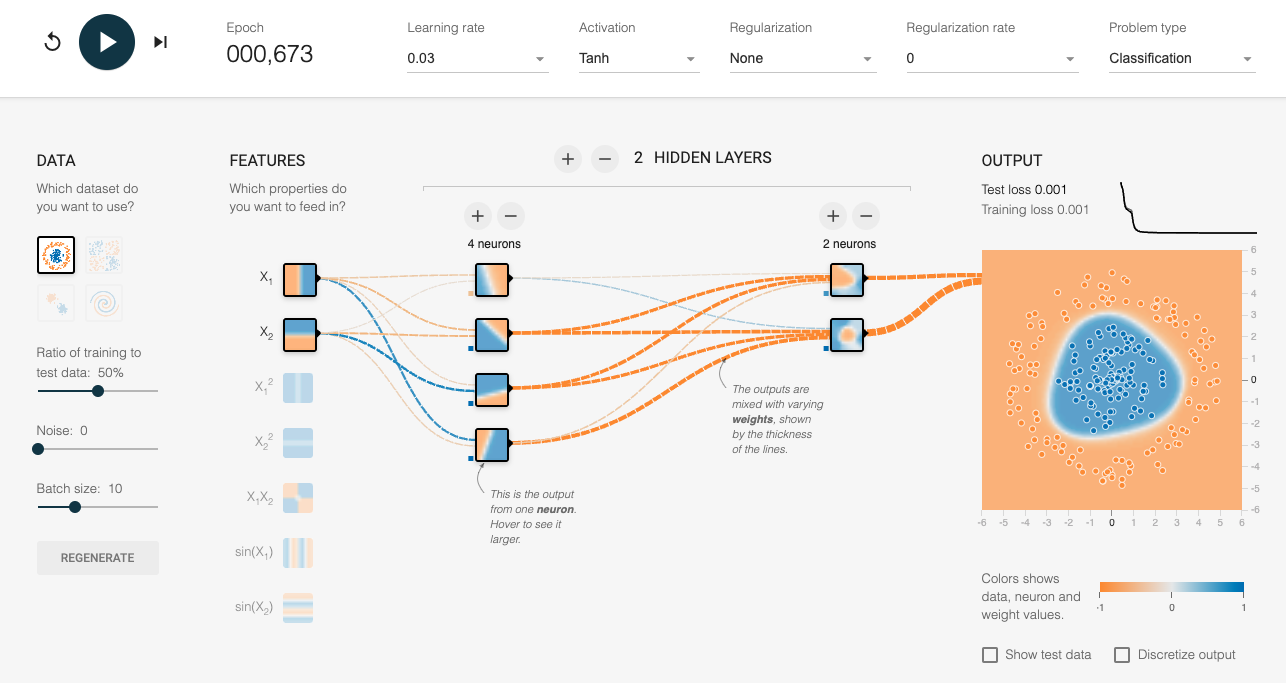

## Exercise: Implement a Two-Neuron Network

**Objective:**

Implement a neural network to predict a binary target based on two inputs, calculate the forward pass, and then apply backpropagation to update the weights and biases.

**Dataset:**

You can use this small synthetic dataset for training:


In [8]:
# Features (X) and Labels (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([0, 1, 1, 0])                      # Corresponding labels (e.g., XOR pattern)

**Network definition:**    
*    **Input Layer**: 2 neurons (corresponding to the 2 features of the input data).
*    **Hidden Layer**: 2 neurons, each receiving inputs from both neurons of the input layer. This layer uses sigmoid activation functions.
*    **Output Layer**: 1 neuron, receiving inputs from the 2 neurons of the hidden layer, and also uses a sigmoid activation function.

**Weights and biases:**

*    Weights for the Hidden Layer (`weights_hidden`): A 2x2 matrix, where each row corresponds to the weights connecting one input feature to the two neurons in the hidden layer.
*    Biases for the Hidden Layer (`bias_hidden`): A 1x2 vector, where each entry is the bias for one neuron in the hidden layer.
*    Weights for the Output Layer (`weights_output`): A 1x2 vector, where each entry is the weight connecting one neuron in the hidden layer to the output neuron.
*    Bias for the Output Layer (`bias_output`): A scalar, as there is only one neuron in the output layer.


**Tip**: Start from the code that was previously presented to explain backpropagation!    

# Second hour - Artificial neural networks

## A simple 3-layer feedforward neural network from scratch to solve a multi-class classification problem

In [31]:
# Package imports
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('darkgrid')

import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from itertools import chain

## Creating the Dataset

For supervised machine learning, we need a dataset. The foundation of any machine learning project is its training dataset, and having access to high-quality data is crucial. The scikit-learn library offers several convenient dataset generators and loaders for testing models. For this tutorial, we will use the make_classification module from `scikit-learn` to generate a two-dimensional, multi-class toy dataset to work with.

In [32]:
X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1,
                           class_sep=0.85, random_state=0)

# Split the dataset into training and validation segments
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1234)

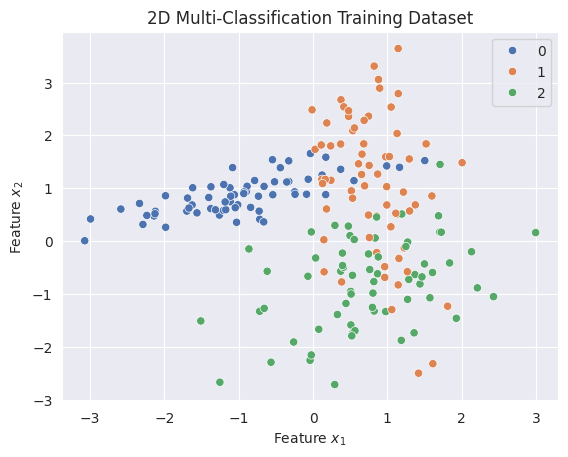

In [33]:
# Plot training dataset
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="deep")
plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')
plt.title('2D Multi-Classification Training Dataset');

The dataset we have created contains three classes, depicted as circles in blue, green, and orange. In the program, these classes are indexed starting from zero and shown using different colors. These colors can be thought of as different categories in a real-world context, like various species of animals, with the x- and y-coordinates representing measurable characteristics of each species.

Our dataset is limited to 2D for simplicity and ease of visualization. In contrast, real-world datasets might contain hundreds or thousands of features across numerous categories, complicating the task of learning from data. This highlights the necessity of employing the scientific method and robust experimental design to develop reliable models that yield meaningful outcomes.

Furthermore, we have divided the dataset into training and validation segments, following standard practice in machine learning experimentation. The model is trained and fine-tuned using the training segment and then evaluated on the validation set using the loss function and potentially additional metrics such as accuracy or the F1 score.

We will set up a basic ANN using Keras, which is a high-level interface for building and training deep learning models using TensorFlow.

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import keras
keras.utils.set_random_seed(812)

 **TensorFlow**: This is one of the most widely used libraries for machine learning and deep learning. It offers both high-level (i.e., Keras) and low-level APIs for model building, training, and inference.

 **Sequential**: This is a module from Keras used to initialize a linear stack of layers, one of the simplest types of neural network architectures.

**Dense**: This refers to a densely connected neural network layer, also known as a fully connected layer. Each neuron in a dense layer receives input from all neurons of the previous layer.

In [49]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features and hidden layer with 10 nodes
    Dense(10, activation='relu'),                    # Another hidden layer with 10 nodes
    Dense(3, activation='softmax')                   # Output layer with 3 nodes (one for each class)
])


**Sequential Model Initialization**: The Sequential model is a linear stack of layers. It is created by passing a list of layer instances. In this case, we include two hidden layers and one output layer.

**First Dense Layer**: This layer is both the input and first hidden layer. It has 10 neurons (or units). The `input_shape` argument indicates the shape of the input data. In this case, we use 2 features. We use a rectified linear unit (relu) activation function.

**Second Dense Layer**: This is another hidden layer with 10 neurons, using the relu activation function. There is no need to specify `input_shape` in subsequent layers because Keras automatically infers the shape from the output of the previous layer.

**Output Dense Layer**: This is the output layer with 3 neurons, one for each class in the dataset. The softmax activation function is used here, which is standard for multi-class classification problems. It outputs a score analogous to the probability of the input being in each class (i.e., limited between 0 and 1, with 1 indicating an increased likelihood of belonging to the corresponding class).

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**Optimizer**: The Adam optimizer is an adaptative algorithm for gradient-based optimization of stochastic objective functions. For more detail, have a look at [this 16-minute video](https://www.youtube.com/watch?v=NE88eqLngkg&ab_channel=DeepBean).

**Loss Function**: `"sparse_categorical_crossentropy"` is used as the loss function for multi-class classification problems where the labels are provided as integers. It measures the disparity between the predicted probability distribution and the true distribution.

**Metrics**: The performance of the model is evaluated based on accuracy, which is the fraction of the predictions our model got right.

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 3)                 33        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Finally, let us train the model on the training data and evaluate it on the validation data.

In [52]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 1s 58ms/step - loss: 1.3524 - accuracy: 0.2985 - val_loss: 1.2141 - val_accuracy: 0.3939
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 1.3211 - accuracy: 0.2985 - val_loss: 1.2000 - val_accuracy: 0.3939
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 1.2919 - accuracy: 0.2985 - val_loss: 1.1871 - val_accuracy: 0.3939
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 1.2651 - accuracy: 0.2985 - val_loss: 1.1744 - val_accuracy: 0.3939
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 1.2394 - accuracy: 0.2910 - val_loss: 1.1617 - val_accuracy: 0.3939
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 1.2129 - accuracy: 0.2836 - val_loss: 1.1494 - val_accuracy: 0.3333
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 1.1857 - accuracy: 0.2836 - val_loss: 1.1371 - val_accuracy: 0.3030
Epoch 8/100
5/5 [===

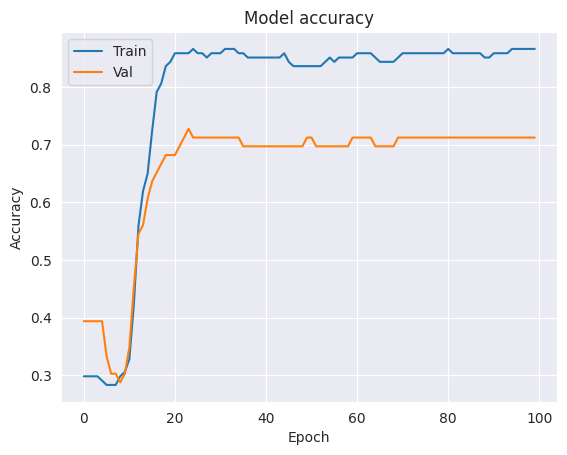

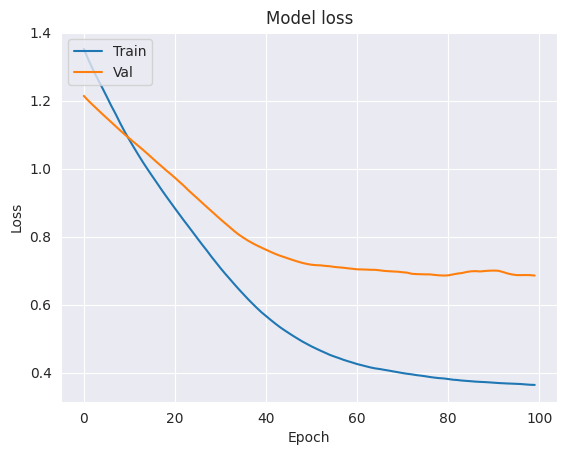

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Using our model

Now, that we have a model, we can use it to predict the class given new values for our two features:

In [54]:
model.predict([[0.1, 0.6]])

1/1 [==============================] - 0s 132ms/step


array([[0.4122778 , 0.49605766, 0.0916646 ]], dtype=float32)

This observation is most likely to be associated with class 0 (41.2%) or class 1 (49.6%).

## Excercise: Classify Points Relative to a Line

**Problem Statement**

Create an artificial neural network that can classify points in a 2-dimensional space as either above or below the line y = x. You will generate a synthetic dataset for this task, build a simple neural network model, train it, and then evaluate its performance.

**Task Details:**

1.    **Generate Data**: Create a set of random points in 2D space and label them based on their position relative to the line y = x.
2.    **Build the Model**: Construct a simple ANN with at least one hidden layer.
3.    **Train the Model**: Use the generated dataset to train your model.
4.    **Evaluate**: Predict the class of new points and visualize the results.

# Homework

We do not provide any homework today because the exercises are likely to take you more time than what is available during the class. As homework, we encourage you to go back to these two exercises and complete them.